## Segment Nuclei and cells, try 1 2022-10-03

Getting started with yeast data following big-fish-examples/4 - Segment nuclei and cells

This is written mostly by copying and pasting with minimal edits.

### Import packages

In [1]:
import os
import bigfish
import bigfish.stack as stack
import bigfish.segmentation as segmentation
import bigfish.multistack as multistack
import bigfish.plot as plot
print("Big-FISH version: {0}".format(bigfish.__version__))

Big-FISH version: 0.6.2


/Users/ewallac2/opt/miniconda3/envs/bigfish_env/lib/python3.9/site-packages/bigfish/segmentation/nuc_segmentation.py:16: FutureWarning: The `skimage.morphology.selem` module is deprecated and will be removed in scikit-image 1.0 (`skimage.morphology.selem` has been moved to `skimage.morphology.footprints`).
  from skimage.morphology.selem import disk


In [2]:
# hard-code the paths of our input and output directories
path_input = "../data/input"
path_output = "../data/output"

### Load data files

Load Z-projection of DAPI for nuclei, and DIC for whole-cells.

Note that the big-fish example used fluorescence to mark whole cells, here we have DIC so it might work differently or not at all.

In [3]:
path = os.path.join(path_input, "2022-04-29_yET915rp1-ASH1CLB2Q670-SRL1CFL610-SUN4Q570_06_DAPI_MAX.tif")
nuc = stack.read_image(path)
print("nucleus image")
print("\r shape: {0}".format(nuc.shape))
print("\r dtype: {0}".format(nuc.dtype), "\n")

path = os.path.join(path_input, "2022-04-29_yET915rp1-ASH1CLB2Q670-SRL1CFL610-SUN4Q570_08_DIC-100.tif")
cell = stack.read_image(path)
print("cell image")
print("\r shape: {0}".format(cell.shape))
print("\r dtype: {0}".format(cell.dtype))

nucleus image
 shape: (2304, 2304)
 dtype: uint16 

cell image
 shape: (2304, 2304)
 dtype: uint16


### Nuclear segmentation using thresholding

Thresholding on DAPI stain is the "easy" way to segment nuclei.

We tried a few different threshold values and settled on 9000 as giving a good visual separation. The plot below shows that we msotly found nuclei. It would be good to quantify that.

In [4]:
# thresholding
nuc_mask = segmentation.thresholding(nuc, threshold=9000)
nuc_mask = segmentation.clean_segmentation(nuc_mask, small_object_size=200, fill_holes=True)
print("nuclei mask")
print("\r shape: {0}".format(nuc_mask.shape))
print("\r dtype: {0}".format(nuc_mask.dtype), "\n")

# labeling
nuc_label = segmentation.label_instances(nuc_mask)
print("nucleus labels")
print("\r shape: {0}".format(nuc_label.shape))
print("\r dtype: {0}".format(nuc_label.dtype))

nuclei mask
 shape: (2304, 2304)
 dtype: bool 

nucleus labels
 shape: (2304, 2304)
 dtype: int64


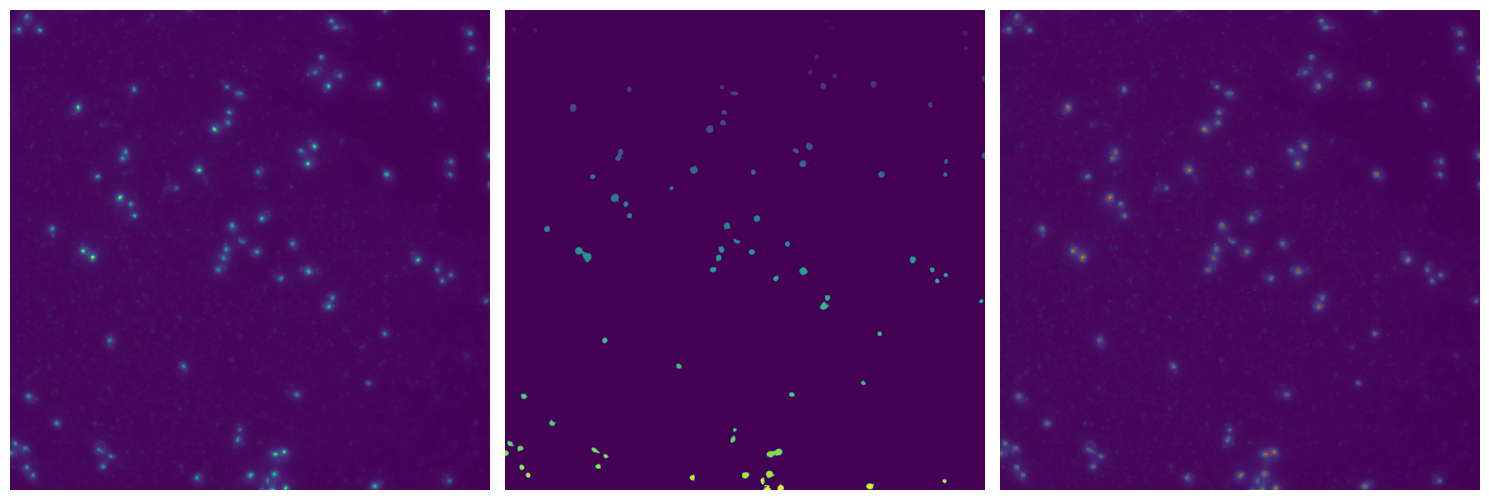

In [5]:
plot.plot_segmentation(nuc, nuc_label, rescale=True)

### Failed attempt to define cell outlines by watershed from thresholded nuclei

We tried various threshold values for `cell_watershed` and they all looked terrible.

Either we should read the help pages for `cell_watershed`, or it just won't work on DIC wiht background debris.

In [6]:
cell_label = segmentation.cell_watershed(cell, nuc_label, threshold=500, alpha=0.9)
print("cell labels")
print("\r shape: {0}".format(cell_label.shape))
print("\r dtype: {0}".format(cell_label.dtype))

cell labels
 shape: (2304, 2304)
 dtype: int64


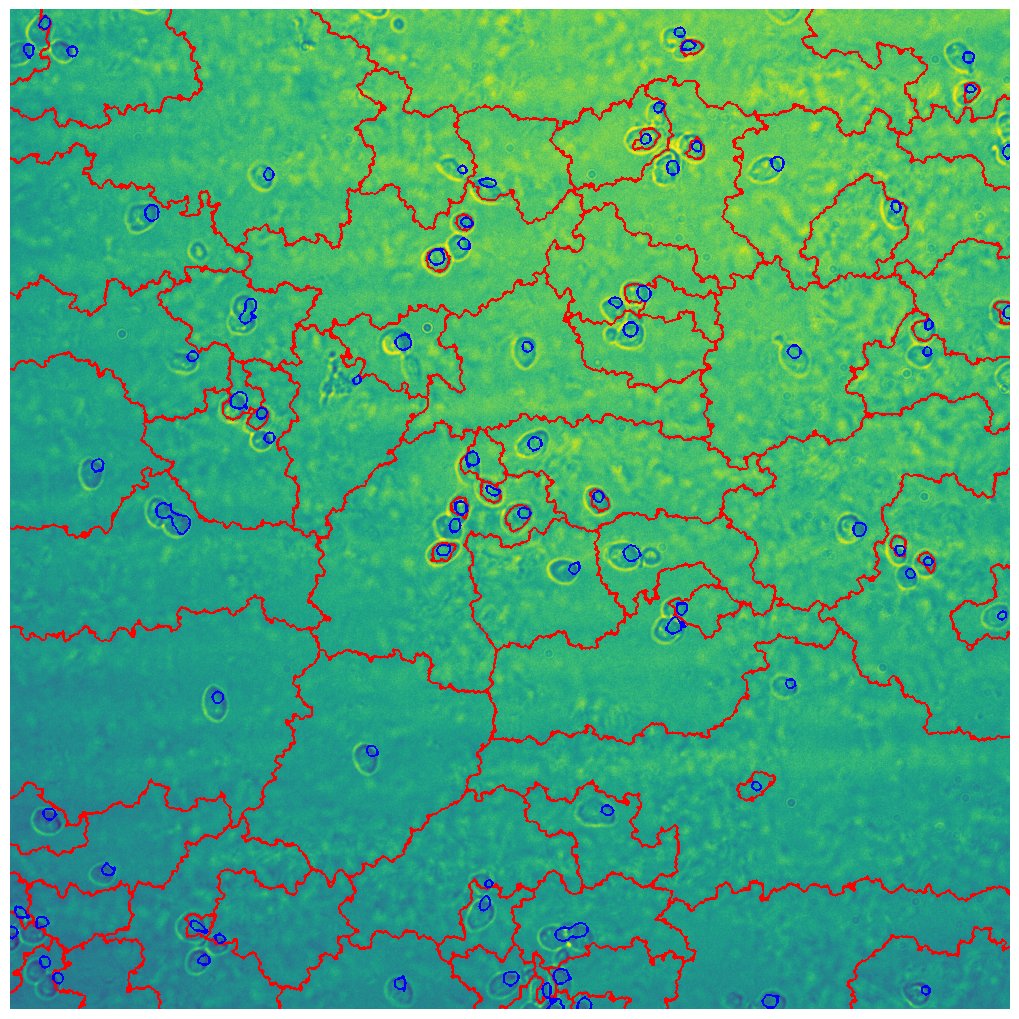

In [7]:
plot.plot_segmentation_boundary(cell, cell_label, nuc_label, contrast=True, boundary_size=4)

## TO DO

- attempt Unet segmentation of nuclei
- attempt Unet segmentation of cells